In [1]:
import xtrack as xt

In [40]:
# Create an environment
env = xt.Environment()

env['k1'] = 1

# Build the simplest stable lattice
line = env.new_line(components=[
    # a quadrupole of length of 1 [m] and k1 equal to 1 [1/m^2]
    env.new('mqf', xt.Quadrupole, length=1, k1='k1'), 
    # a drift of length of 1 [m]
    env.new('drift_1',  xt.Drift, length=1),
    env.new('mqd', xt.Quadrupole, length=1, k1='-k1'),
    env.new('drift_2',  xt.Drift, length=1),
])

# Define reference particle
line.particle_ref = xt.Particles(p0c=20e9, mass0=xt.PROTON_MASS_EV)

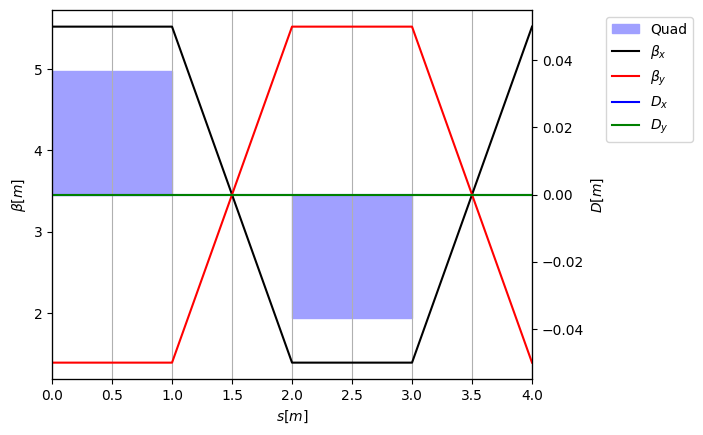

In [37]:
my_twiss = line.twiss4d()
my_twiss.plot()

In [38]:
my_twiss.R_matrix[0:2,0:2]

array([[-3.10601663,  5.22474317],
       [-1.65239137,  2.45759165]])

In [41]:
print(f'Qx (tune x) = {my_twiss.qx}')
print(f'DQx (x-chromaticity) = {my_twiss.dqx}')

Qx (tune x) = 0.30254964175929033
DQx (x-chromaticity) = -0.44251119709182163


In [46]:
import numpy as np
mux_list = []
k1_list = []
dqx_list = []

for my_k1 in np.linspace(0.01, 1.23105, 50):
    env['k1'] = my_k1
    my_twiss = line.twiss4d()
    mux_list.append(my_twiss['mux'][-1])
    k1_list.append(my_k1)
    dqx_list.append(my_twiss.dqx)

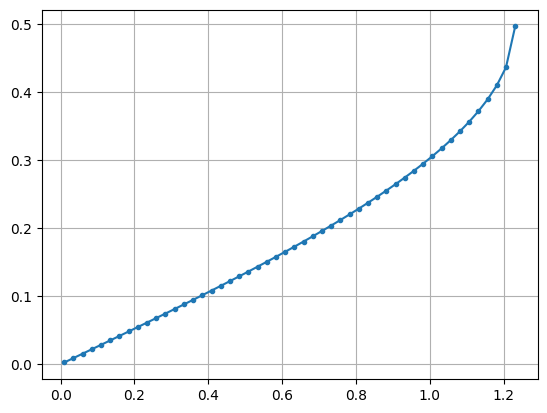

In [47]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(k1_list, mux_list,'.-')
plt.grid(True)

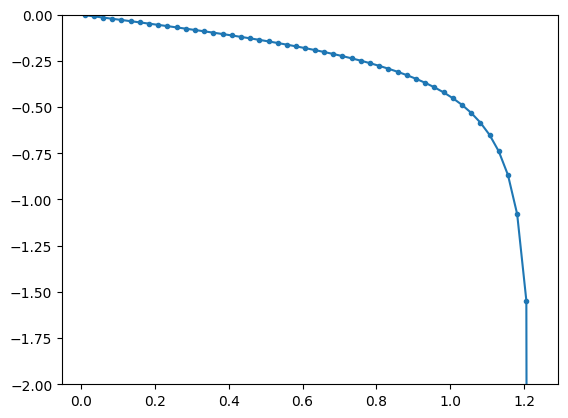

In [51]:
plt.plot(k1_list, dqx_list,'.-')
plt.ylim([-2,0]);

In [6]:
env['k1'] = 1

particles = line.build_particles(
                        x=[1e-3],
                        px=[0],
                        y=[0],
                        py=[0],
                        zeta=[0],
                        delta=[0])
# Reference mass, charge, energy are taken from the reference particle.
# Particles are allocated on the context chosen for the line.

## Track (saving turn-by-turn data)
n_turns = 1000000
line.track(particles, num_turns=n_turns, freeze_longitudinal=True,
              turn_by_turn_monitor=True)

## Turn-by-turn data is available at:
#line.record_last_track.x

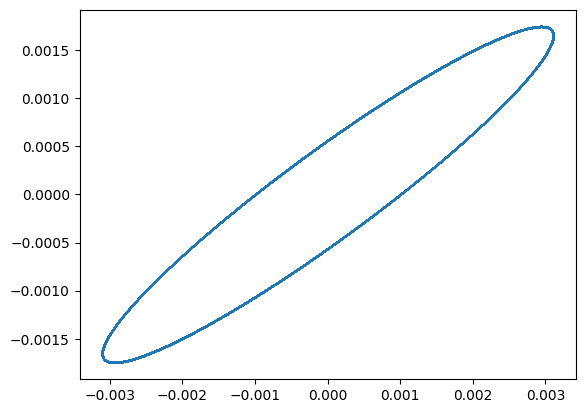

In [7]:
plt.figure()
plt.plot(line.record_last_track.x[0,:], line.record_last_track.px[0,:], '.', ms=.05)
plt.show()